# Title: Heart Disease Prediction

**Author:** Ikram Shahzad  
**Date:** 15 June 2024  
**Dataset:** Heart Disease UCI

## Metadata

# Aims and Objektives of EDA.

\\


In [145]:
# import Libararies

# To handle data
import numpy as np
import pandas as pd

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to preprocess data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer, KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [146]:
# import data
df = pd.read_csv('heart_disease_uci.csv')

In [147]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [149]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

## Exploratory Data Analysis (EDA)

Explore each Column

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [151]:
# data shape
df.shape

(920, 16)

In [152]:
# id kolumn
df['id'].min(), df['id'].max()

(1, 920)

In [153]:
# age kolumn
df['age'].min(), df['age'].max()

(28, 77)

In [154]:
len(df)

920

In [155]:
df.age.describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

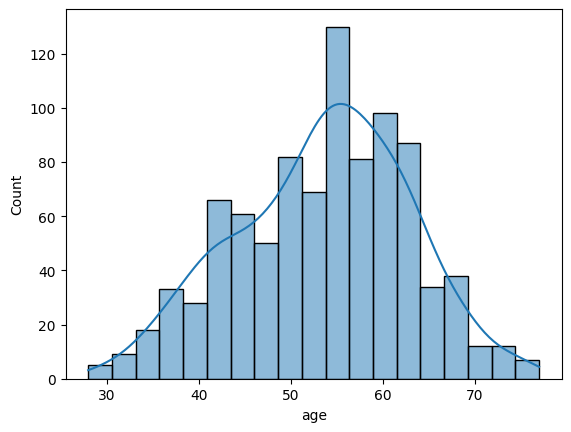

In [156]:
# draw a histogram to see the distribution of age kolumn
sns.histplot(df.age, kde=True)

age mean: 53.51086956521739
age median: 54.0
age mode: 54


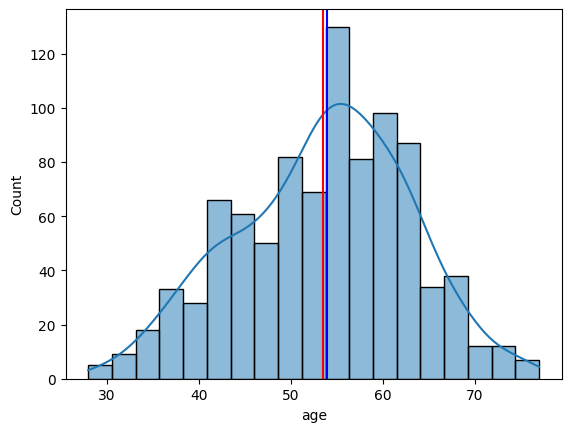

In [157]:
# draw a histogram to see the distribution of age kolumn
sns.histplot(df.age, kde=True);

# plotting mean, median, mode
plt.axvline(df.age.mean(), color='red')
plt.axvline(df.age.median(), color='orange')
plt.axvline(df.age.mode()[0], color='blue')

print('age mean:', df.age.mean())
print('age median:', df.age.median())
print('age mode:', df.age.mode()[0])

# Explore the gender based distribution of the dataset for age kolumn.

In [158]:
fig =  px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [159]:
# find the value kount of age kolumn grouping by sex kolumn
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [160]:
# find the values of sex kolums
df.sex.value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [161]:
print(f'Male percentage in the data: {(726)/920 * 100:0.2f} %')
print(f'FeMale percentage in the data: {100 - (726)/920 * 100:0.2f} %')

Male percentage in the data: 78.91 %
FeMale percentage in the data: 21.09 %


In [162]:
print(f'Males are: {(726)/920 * 100 - (100 - (726)/920 * 100)/(100 - (726)/920 * 100) } % more than females in the data.')

Males are: 77.91304347826087 % more than females in the data.


In [163]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [164]:
df.groupby('sex')['age'].value_counts().sum()

920

In [165]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [166]:
df.dataset.unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [167]:
df.dataset.value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

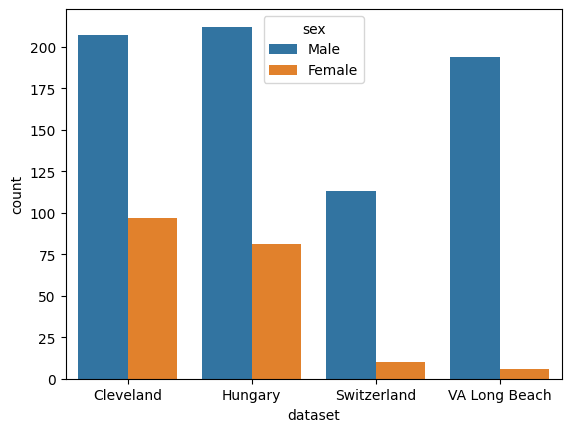

In [168]:
sns.countplot(data=df, x='dataset', hue='sex')

In [169]:
fig = px.bar(df, x='dataset', color='sex')
fig.show()

In [170]:
# sex wise data in dataset feature.
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [171]:
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

In [172]:
print('Mean of dataset:',df.groupby('dataset')['age'].mean())
print('--------------------------------------------')
print('Median of dataset:',df.groupby('dataset')['age'].median())
print('--------------------------------------------')
print('Mode of dataset:',df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean of dataset: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
--------------------------------------------
Median of dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
--------------------------------------------
Mode of dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


# lets explore cp feature.

In [173]:
df.cp.unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [174]:
df.cp.unique().size

4

In [175]:
df.cp.value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [176]:
df.groupby('cp')['age'].value_counts()

cp              age
asymptomatic    57     27
                58     23
                54     22
                59     22
                60     22
                       ..
typical angina  60      1
                63      1
                66      1
                68      1
                74      1
Name: count, Length: 156, dtype: int64

In [177]:
fig = px.histogram(data_frame=df, color='cp', x='age')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

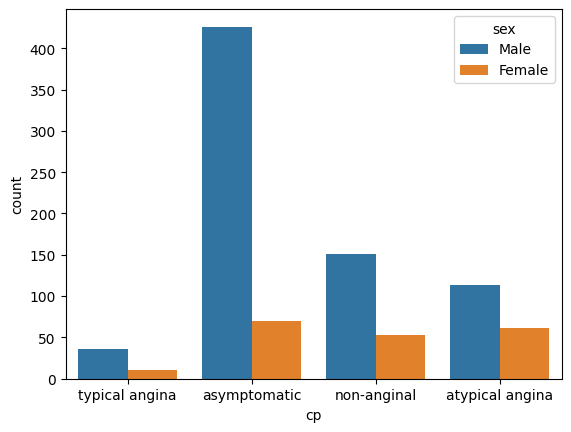

In [178]:
sns.countplot(df, x='cp', hue='sex')


<Axes: xlabel='cp', ylabel='count'>

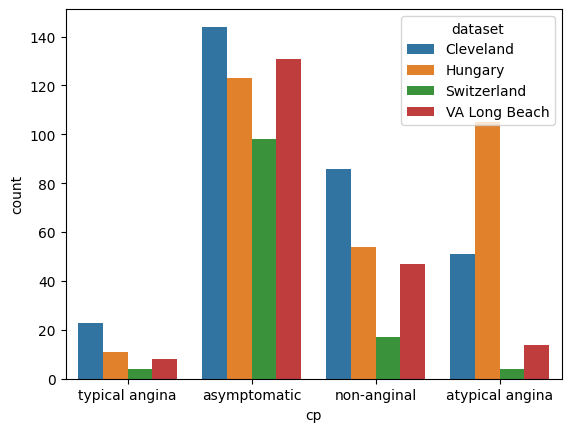

In [179]:
sns.countplot(df, x='cp', hue='dataset')


# Explore the trestbps kolumn

In [180]:
df.trestbps.unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190.,  nan, 113.,  92.,
        95.,  80., 185., 116.,   0.,  96., 127.])

In [181]:
df.trestbps.unique().size

62

In [182]:
df.trestbps.value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64

In [183]:
df.trestbps.value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64

In [184]:
df.trestbps.describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [185]:
len(df)-len(df.trestbps)

0

<Axes: xlabel='trestbps', ylabel='Count'>

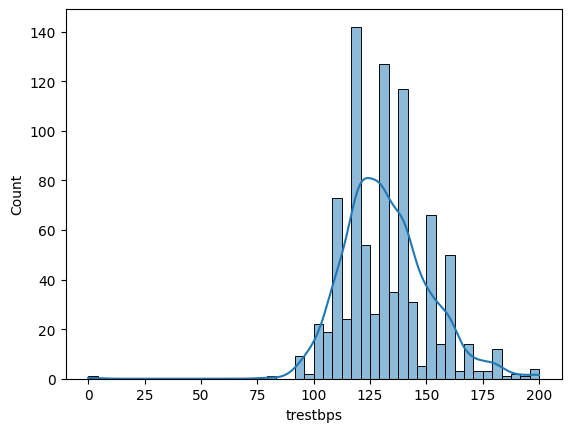

In [186]:
sns.histplot(df.trestbps, kde=True)

# deal missing  values in trestbps

In [187]:
print('The number of Missing values in trestpbs:',  df.trestbps.isnull().sum()) 
print(f'The percentage of Missing values in trestpbs:  {(df.trestbps.isnull().sum() * 100)/len(df):0.2f}') 

The number of Missing values in trestpbs: 59
The percentage of Missing values in trestpbs:  6.41


In [188]:
imputer = IterativeImputer(max_iter=10, random_state=42)
imputer.fit(df[['trestbps']])
df['trestbps'] = imputer.transform(df[['trestbps']])
print('The number of Missing values in trestbps:',  df.trestbps.isnull().sum()) 

The number of Missing values in trestbps: 0


# impute missing values in other kolumns

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [190]:
imputer1 = IterativeImputer(max_iter=10, random_state=42)
imputer1.fit(df[['ca']])
df['ca'] = imputer1.transform(df[['ca']])
print('The number of Missing values in ca:',  df.ca.isnull().sum()) 

The number of Missing values in ca: 0


In [191]:
imputer1 = IterativeImputer(max_iter=10, random_state=42)
df['thalch'] = imputer1.fit_transform(df[['thalch']])
print('The number of Missing values in thalch:',  df.thalch.isnull().sum())
df['oldpeak'] = imputer1.fit_transform(df[['oldpeak']])
print('The number of Missing values in oldpeak:',  df.oldpeak.isnull().sum()) 

The number of Missing values in thalch: 0
The number of Missing values in oldpeak: 0


---

# impute the missing values using ML model

In [211]:
missing_data_kols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_kols

['chol', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [213]:
kat_kols =  df.select_dtypes(include='object').columns.tolist()
numerik_kols =  df.select_dtypes(exclude='object').columns.tolist()
print(f'kat_kols: {kat_kols}')
print(f'numerik_kols: {numerik_kols}')

kat_kols: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerik_kols: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [214]:
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Suppress specific warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=UserWarning)  # General suppression for other warnings

def impute_and_evaluate(df, feature):
    """
    Imputes missing values in a feature using Random Forest and returns imputation metrics.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the feature to impute.
    feature (str): The name of the feature to impute.

    Returns:
    tuple: (pd.DataFrame, dict) - The DataFrame with imputed feature and metrics.
    """
    # Separate the rows with and without missing values in the target feature
    df_missing = df[df[feature].isnull()]
    df_not_missing = df[~df[feature].isnull()]

    # If there are no missing values, return the original DataFrame with empty metrics
    if df_missing.empty:
        return df, {}

    # Determine if the feature is categorical or numerical
    if df[feature].dtype == 'object':
        # Categorical feature
        le = LabelEncoder()
        df_not_missing[feature] = le.fit_transform(df_not_missing[feature])

        # Prepare the data
        X = pd.get_dummies(df_not_missing.drop(columns=[feature]))
        y = df_not_missing[feature]

        # Split the data to evaluate the model
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit the Random Forest Classifier
        rf = RandomForestClassifier()
        rf.fit(X_train, y_train)

        # Predict on test set to get the accuracy
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Prepare the data for prediction (rows with missing values)
        X_missing = pd.get_dummies(df_missing.drop(columns=[feature]))
        X_missing = X_missing.reindex(columns=X.columns, fill_value=0)

        # Predict the missing values
        predicted = rf.predict(X_missing)
        df_missing[feature] = le.inverse_transform(predicted)

        # Combine the DataFrame with missing and non-missing parts
        df_not_missing[feature] = le.inverse_transform(df_not_missing[feature])
        df_imputed = pd.concat([df_not_missing, df_missing]).sort_index()

        # Metrics
        metrics = {
            'accuracy': accuracy
        }

    else:
        # Numerical feature
        # Prepare the data
        X = pd.get_dummies(df_not_missing.drop(columns=[feature]))
        y = df_not_missing[feature]

        # Split the data to evaluate the model
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit the Random Forest Regressor
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train)

        # Predict on test set to get the mean squared error
        y_pred = rf.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        # Prepare the data for prediction (rows with missing values)
        X_missing = pd.get_dummies(df_missing.drop(columns=[feature]))
        X_missing = X_missing.reindex(columns=X.columns, fill_value=0)

        # Predict the missing values
        predicted = rf.predict(X_missing)
        df_missing[feature] = predicted

        # Combine the DataFrame with missing and non-missing parts
        df_imputed = pd.concat([df_not_missing, df_missing]).sort_index()

        # Metrics
        metrics = {
            'mean_squared_error': mse
        }

    return df_imputed, metrics

def impute_all_features(df):
    """
    Imputes missing values for all features in the DataFrame using Random Forest and returns imputed DataFrame and metrics.

    Parameters:
    df (pd.DataFrame): The DataFrame containing features to impute.

    Returns:
    tuple: (pd.DataFrame, dict) - The DataFrame with imputed features and metrics for each feature.
    """
    imputed_dfs = df.copy()
    all_metrics = {}

    for feature in df.columns:
        if df[feature].isnull().any():
            print(f"Before imputation of feature '{feature}':")
            print(imputed_dfs)
            imputed_dfs, metrics = impute_and_evaluate(imputed_dfs, feature)
            print(f"After imputation of feature '{feature}':")
            print(imputed_dfs)
            all_metrics[feature] = metrics

    return imputed_dfs, all_metrics


In [215]:
df = pd.read_csv('heart_disease_uci.csv')

# Impute missing values for all features
df_imputed_all, metrics_all = impute_all_features(df)

print("Final imputed DataFrame:")
print(df_imputed_all)
print("Metrics for all features:", metrics_all)

Before imputation of feature 'trestbps':
      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254

In [216]:
df_imputed_all.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [217]:
df = df_imputed_all
df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Outputs: 
1. The minimum age of having heart deisease is 28 and maximum age is 77 years.
2. Most of the people get heart disease at the age of 53-54.
3. Most of the males and females having heart disease at the age of 54-55 years.
4. Male percentage in the data: 78.91 %
5. FeMale percentage in the data: 21.09 %
6. Males are 274.23 % more than females in the data.
7. We have highest number of people from kleveland (304) and lowest from switzerland (123).
   1. The highest number of females in the dataset are from Clevland (97) and lowest from VA long(6).
   2. The highest number of males in the dataset are from Hungary (212) and lowest from Swizerland(113).
8. 'Write observation about mean, median and mode of dataset'.
9. Write the observations from cp feature.
10. Write the steps to impute missing values in the df.
11. 